## I. For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### 1. Has the network latency gone up since we switched internet service providers?

#### Restated:
Has network latency (in time) increased with the new ISP?
#### H0 (null hypothesis) =
Network latency with the new ISP is the same or less than the old ISP.
#### Ha (alt.hypothesis) = 
Network latency is greater with the new ISP.
#### True positive example:
Network latency is greater with the new ISP, and our hypothesis testing rejects H0.
#### True negative example:
Network latency is the same between the two, and our hypothesis testing accepts H0.
#### Type I error (false pos.) example:
Network latency is the same, but we reject the H0 and say the new one is longer.
#### Type II error (false neg.) example:
Network latency is greater with the new ISP, but we accept H0 (that they are the same or its decreased).

### 2. Is the website redesign any good?

#### Restated:
Is the new website design leading to more sales?
#### H0 (null hypothesis) =
Sales rates and metrics related to the website are the same for both designs, or have decreased.
#### Ha (alt.hypothesis) = 
Sales rates and metrics related to the website are greater for new design.
#### True positive example:
Sales rates and metrics related to the website are up and we rejected the H0.
#### True negative example:
Sales rates and metrics related to the website haven't changed, and we've accepted the H0 (that they wouldn't).
#### Type I error (false pos.) example:
Sales rates and metrics related to the website haven't changed, but we reject the H0 and say they are greater.
#### Type II error (false neg.) example:
Sales rates and metrics related to the website have improved, but we accept the H0 thinking they haven't (or have decreased).

### 3. Is our television ad driving more sales?

#### Restated:
During the time and in the markets where our television ad plays, have sales increased compared to other markets and times without the ad?
#### H0 (null hypothesis) =
Sales are no different or lower between the markets and times where the ad plays, and where it does not.
#### Ha (alt.hypothesis) = 
Sales are different between the markets and times where the ad plays, and where it does not.
#### True positive example:
When/where the ad plays sales go up, and we have rejected H0.
#### True negative example:
When/where the ad plays sales are no different than elsewhere, and we have accepted H0.
#### Type I error (false pos.) example:
When/where the ad plays sales are no different than elsewhere, but we reject the H0 and say sales are better.
#### Type II error (false neg.) example:
When/where the ad plays sales go up, but we accept H0 (that they are the same).

## II. t-tests

In [100]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env

### 4. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [58]:
office1_mean = 90
office1_sdev = 15
office1_n = 40

office2_mean = 100
office2_sdev = 20
office2_n = 50

office1 = np.random.normal(office1_mean, office1_sdev, office1_n)
office2 = np.random.normal(office2_mean, office2_sdev, office2_n)

alpha = .05

#30+ samples, independant, test variances:
office1.var(), office2.var()
#unequal variances

#H0 - There is no differnce in time.
#Ha - There is a difference in time.
#Two sided t-test

t,p = stats.ttest_ind_from_stats(office1_mean, office1_sdev, office1_n, office2_mean, office2_sdev, office2_n, equal_var = False)
p

# p < alpha, therefore we reject the null hypothesis

0.00811206270346016

0.008 < .05, thus we reject the null hypothesis

### 5. From pydataset use 'mpg'

In [16]:
from pydataset import data
mpg = data('mpg')

#### (5a) Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [35]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [27]:
cars_2008 = mpg[mpg.year == 2008].efficiency
cars_1999 = mpg[mpg.year == 1999].efficiency
cars_1999.count(), cars_2008.count()

(117, 117)

In [31]:
#n = 117 for both so can assume normalcy.  Lets check descriptive stats:
cars_2008.mean(), cars_1999.mean(), cars_2008.std(), cars_1999.std()

(20.076923076923077, 20.22222222222222, 4.90891842528482, 5.207936766511732)

In [59]:
t,p = stats.ttest_ind(cars_2008, cars_1999, equal_var = True)
t, p

(-0.21960177245940962, 0.8263744040323578)

We do not reject the null hypothesis that there is no difference in fuel econ between 1999 and 2008

#### (5b) Are compact cars more fuel-efficient than the average car?

In [40]:
mpg['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [44]:
cars_compact = mpg[mpg['class'] == 'compact'].efficiency
cars = mpg.efficiency
cars_compact. describe()
cars.describe()

count    234.000000
mean      20.149573
std        5.050290
min       10.500000
25%       15.500000
50%       20.500000
75%       23.500000
max       39.500000
Name: efficiency, dtype: float64

In [46]:
t,p = stats.ttest_ind_from_stats(cars_compact.mean(), cars_compact.std(), cars_compact.count(), cars.mean(), cars.std(), cars.count(), equal_var = False)
t, p

(6.646345489688162, 2.3577939603784718e-09)

We reject the null hypothesis that compact cars have the same fuel economy as the average car (compact inclusive).

#### (5c) Do manual cars get better gas mileage than automatic cars?

In [48]:
mpg['trans'].unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [56]:
cars_auto = mpg[mpg['trans'].str.contains('auto')].efficiency
cars_man = mpg[mpg['trans'].str.contains('manual')].efficiency

t,p = stats.ttest_ind_from_stats(cars_auto.mean(), cars_auto.std(), cars_auto.count(), cars_man.mean(), cars_man.std(), cars_man.count(), equal_var = False)
t, p

(-4.443514012903071, 1.795224899991793e-05)

In [57]:
cars_auto.mean(), cars_man.mean()

(19.130573248407643, 22.227272727272727)

We reject the null hypothesis that manual and automatic cars get the same gas mileage.

## III. Correlation

### 6. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [94]:
# import telco data from wherever it lives
telco = pd.read_csv('telco_data.csv')
telco.total_charges.fillna(0)
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7049 non-null   object 
 1   gender                     7049 non-null   object 
 2   is_senior_bool             7049 non-null   int64  
 3   is_senior                  7049 non-null   object 
 4   payment_type               7049 non-null   object 
 5   monthly_charges            7049 non-null   float64
 6   total_charges              7038 non-null   float64
 7   churn                      7049 non-null   object 
 8   tenure                     7049 non-null   float64
 9   is_female_bool             7049 non-null   int64  
 10  has_churned_bool           7049 non-null   int64  
 11  has_phone_bool             7049 non-null   int64  
 12  has_internet_bool          7049 non-null   int64  
 13  contract_details           7049 non-null   objec

<AxesSubplot:xlabel='total_charges', ylabel='full_months_tenure'>

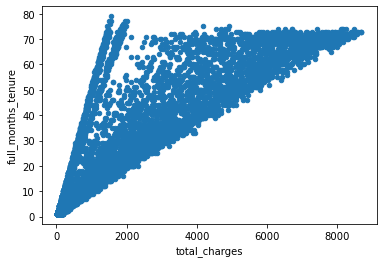

In [87]:
#scatterplot the tenure 
telco.plot.scatter(y='full_months_tenure', x='total_charges')

r = 0.8260946136723617
p = 0.0


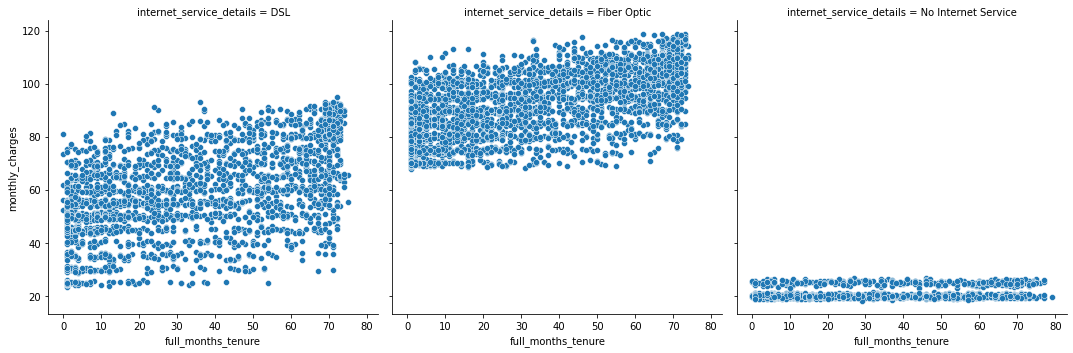

In [93]:
x = telco.full_months_tenure
y = telco.total_charges.fillna(0)
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)
sns.relplot(data = telco, y = 'monthly_charges',x = 'full_months_tenure', col='internet_service_details')

### 7. Use the employees database.

In [95]:
from env import get_db_url

#### (7a) Is there a relationship between how long an employee has been with the company and their salary?

In [103]:
query = '''
SELECT 
    employees.emp_no,
    salaries.salary,
    DATEDIFF(IF(salaries.to_date > NOW(),
                NOW(),
                salaries.to_date),
            employees.hire_date) / 365 AS Tenure
FROM
    employees
        JOIN
    salaries USING (emp_no);
'''

salaries = pd.read_sql(query, get_db_url('employees'))
salaries.head()

,emp_no,salary,Tenure
0,10001,60117,1.0
1,10001,62102,2.0
2,10001,66074,3.0
3,10001,66596,4.0
4,10001,66961,5.0


<AxesSubplot:xlabel='Tenure', ylabel='salary'>

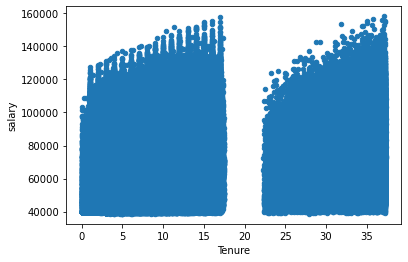

In [107]:
salaries.plot.scatter(y='salary', x='Tenure')

In [110]:
r, p = stats.pearsonr(salaries.Tenure, salaries.salary)
r,p

(0.3072319257599605, 0.0)

#### (7b) Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [123]:
query = '''
SELECT 
    employees.emp_no,
    MAX(DATEDIFF(IF(titles.to_date > NOW(),
                NOW(),
                titles.to_date),
            employees.hire_date) / 365) AS Tenure,
    COUNT(titles.title) AS Titles
FROM
    employees
        JOIN
    titles USING (emp_no)
    GROUP BY emp_no;
'''

title_count = pd.read_sql(query, get_db_url('employees'))
title_count.sample(10)

,emp_no,Tenure,Titles
232980,432956,36.0137,2
230202,430178,35.6630,2
271641,471617,34.5205,2
247781,447757,36.1479,2
83136,93137,11.3233,2
286913,486889,27.5288,1
114606,214582,34.7233,2
218357,418333,28.5014,2
118845,218821,35.0082,1
10641,20642,32.9096,2


<AxesSubplot:xlabel='Tenure', ylabel='Titles'>

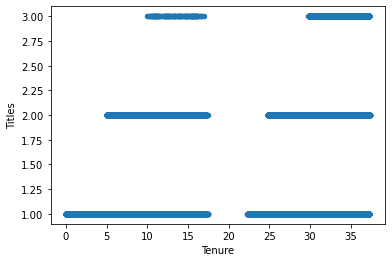

In [124]:
title_count.plot.scatter(y='Titles', x='Tenure')

In [126]:
r, p = stats.pearsonr(title_count.Titles, title_count.Tenure)
r,p

(0.3492143792631931, 0.0)

### 8. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [131]:
from pydataset import data
sleep = data("sleepstudy")

In [132]:
sleep.describe()

,Reaction,Days,Subject
count,180.000000,180.000000,180.000000
mean,298.507892,4.500000,341.277778
std,56.328757,2.880293,20.320905
min,194.332200,0.000000,308.000000
25%,255.375825,2.000000,331.000000
50%,288.650800,4.500000,336.000000
75%,336.752075,7.000000,352.000000
max,466.353500,9.000000,372.000000


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

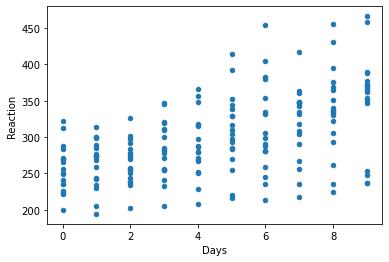

In [133]:
sleep.plot.scatter(y='Reaction',x='Days')

In [134]:
r, p = stats.pearsonr(sleep.Reaction, sleep.Days)
r,p

(0.5352302262650253, 9.894096322214812e-15)